# Exploration of St. Bernard Voter Data

In [278]:
import warnings; warnings.simplefilter('ignore') #ignore pandas incompatibility warnings
import pandas as pd
import matplotlib.pyplot as plt
third_parties = ['Reform','Green', 'Independent', 'Unaffiliated', 'Libertarian']
all_voters = pd.read_csv(open('StB_All_Individual.csv')).replace(to_replace=third_parties, value="Other")
all_voters['PrecinctName'] = all_voters['PrecinctName'].astype(str)

def count_table(freq_series):
    freq_pct = freq_series.value_counts(normalize=True).round(decimals=3) * 100
    return pd.concat([freq_series.value_counts(), freq_pct], axis=1, keys=['Count', 'Percent'])

def pie_from_count_table(count_table, party):
    return count_table['Percent'].plot(kind='pie', 
                                       title="%s Voting Frequency 0-5" % (party)).axis('equal')

## Breakdown of voters by registered party and voting frequency

Democrat      11387
Other          8631
Republican     5802
Name: OfficialParty, dtype: int64


(-1.115934516628701,
 1.1007587865061286,
 -1.1173099397358128,
 1.127901084592349)

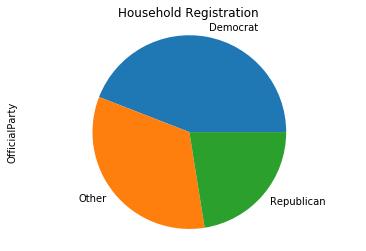

In [279]:
print all_voters['OfficialParty'].value_counts()
all_voters['OfficialParty'].value_counts().plot(kind='pie', title='Household Registration').axis('equal')


### Voter Frequency — Overall

0    8474
2    5782
1    5698
3    3321
4    1693
5     852
Name: OverAllFrequency, dtype: int64
(-1.1242011323196177, 1.1011524348723627, -1.124431246094161, 1.1052388282431715)


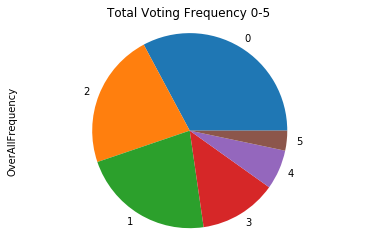

In [280]:
print all_voters['OverAllFrequency'].value_counts()
print all_voters['OverAllFrequency'].value_counts().plot(kind='pie', title='Total Voting Frequency 0-5').axis('equal')

### Voter Frequency — registered republicans

   Count  Percent
0   1465     25.2
1   1161     20.0
2   1271     21.9
3    953     16.4
4    795     13.7
5    157      2.7
(-1.1227447024159751, 1.1010830928674107, -1.1040771959692672, 1.1020536909936545)


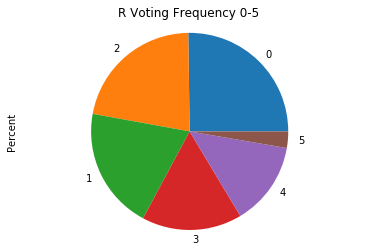

In [281]:
is_republican = all_voters['OfficialParty'] == 'Republican'
registered_republicans = all_voters[is_republican]
rep_count_table = count_table(registered_republicans['OverAllFrequency'])
print rep_count_table.sort_index()
print pie_from_count_table(rep_count_table, "R")

### Voter Frequency — registered democrats

   Count  Percent
0   3577     31.4
1   2330     20.5
2   2616     23.0
3   1653     14.5
4    884      7.8
5    327      2.9
(-1.1299621454537347, 1.1014267688311303, -1.1022426921315442, 1.1116079772094398)


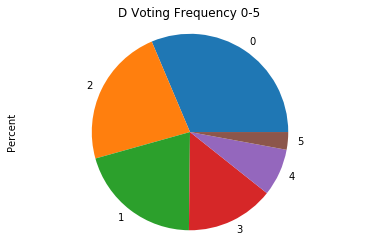

In [282]:
is_democrat = all_voters['OfficialParty'] == 'Democrat'
registered_democrats = all_voters[is_democrat]
dem_count_table = count_table(registered_democrats['OverAllFrequency'])
print dem_count_table.sort_index()
print dem_count_table['Percent'].plot(kind='pie', title='D Voting Frequency 0-5').axis('equal')

### Voter frequency — no/third party

   Count  Percent
0   3432     39.8
1   2207     25.6
2   1895     22.0
3    715      8.3
4     14      0.2
5    368      4.3
(-1.109127194615456, 1.1004346283150217, -1.116725063877805, 1.1188121765191914)


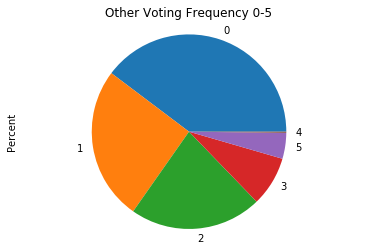

In [283]:
is_not_democrat = all_voters['OfficialParty'] != 'Democrat'
is_not_republican = all_voters['OfficialParty'] != 'Republican'
registered_other = all_voters[is_not_democrat & is_not_republican]
other_count_table = count_table(registered_other['OverAllFrequency'])
print other_count_table.sort_index()
print pie_from_count_table(other_count_table, "Other")

# Demographics

## Ethnicity

                          Count  Percent
White / Caucasian         19135     74.1
Black / African American   4971     19.3
Hispanic / Latino           630      2.4
Other / Multi-Racial        627      2.4
Asian / Pacific Islander    321      1.2
Native American Indian      136      0.5
(-1.119064510995051, 1.100907835006564, -1.1112249141471824, 1.1201770346880655)


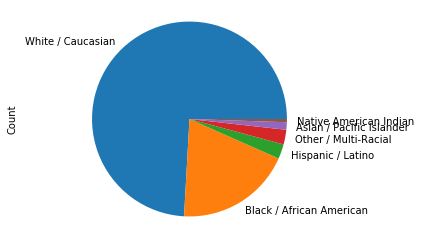

In [284]:
eth_count = count_table(all_voters['StateEthnicity'])
print eth_count
print eth_count['Count'].plot(kind='pie').axis('equal')

## Gender

   Count  Percent
F  14067     54.5
M  11752     45.5
U      1      0.0
(-1.1106980263948079, 1.1005094298327105, -1.1255899121348358, 1.1119003016009823)


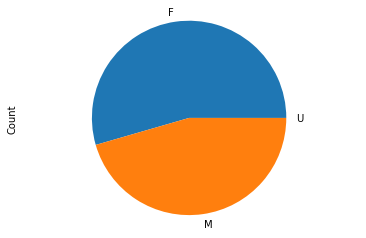

In [293]:
gender_count = count_table(all_voters['Gender'])
print gender_count
print gender_count['Count'].plot(kind='pie').axis('equal')

## Voter Frequency by Ethnicity

   Asian / Pacific Islander  Black / African American  Hispanic / Latino  \
0                       160                      1667                233   
1                        82                      1437                198   
2                        36                       737                124   
3                        19                       506                 44   
4                        13                       365                 16   
5                        11                       259                 15   

   Native American Indian  Other / Multi-Racial  White / Caucasian  
0                      41                   255               6118  
1                      38                   169               3774  
2                      33                    86               4766  
3                      15                    41               2696  
4                       5                    13               1281  
5                       4                    63      

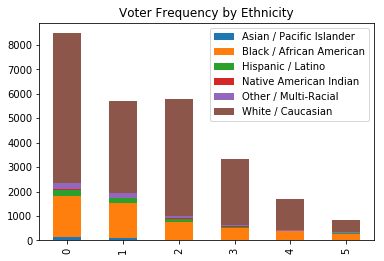

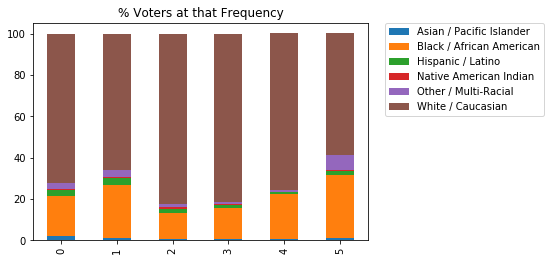

In [291]:
eth_group = all_voters.groupby(['StateEthnicity'])
eth_counts = pd.DataFrame(index=[0,1,2,3,4,5])
for name, group in eth_group:
    eth_counts = pd.concat([eth_counts, group['OverAllFrequency'].value_counts().rename(name)], axis=1)
print eth_counts

print eth_counts.plot(kind='bar', title='Voter Frequency by Ethnicity', stacked=True)

total_counts = all_voters['OverAllFrequency'].value_counts()
eth_pct = pd.DataFrame(index=[0,1,2,3,4,5])
for col in eth_counts.columns:
    eth_pct = pd.concat([eth_pct, (eth_counts[col] / total_counts).rename(col)], axis=1)
eth_pct = eth_pct.round(decimals=3) * 100

print eth_pct.plot(kind='bar', title='% Voters at that Frequency', stacked=True).legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

##  Voter Frequency by Gender

AxesSubplot(0.125,0.125;0.775x0.755)


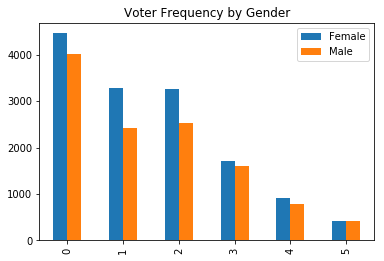

In [287]:
female_voters = all_voters[all_voters['Gender'] == "F"]
male_voters = all_voters[all_voters['Gender'] == "M"]

f_count = count_table(female_voters['OverAllFrequency'])
m_count = count_table(male_voters['OverAllFrequency'])
gender_counts = pd.concat([f_count['Count'].rename("Female"), m_count['Count'].rename('Male')], axis=1).sort_index()
print gender_counts.plot(kind='bar', title="Voter Frequency by Gender")


# Chronic voters by precinct

In [288]:
is_chronic_voter = all_voters['OverAllFrequency'] > 2
chronic_voters = all_voters[is_chronic_voter]
chronic_voters['PrecinctName'].value_counts()


32     387
50     340
55     320
11     290
24     288
13     282
52     271
30     269
42A    249
31     246
44     221
42     219
14     196
33     190
54     190
41     177
22     163
20     159
10     153
43     150
12     133
21     130
25     130
15     111
51     110
45     104
46     103
40      92
53      87
23      62
34      44
Name: PrecinctName, dtype: int64

## Chronic voters as a percentage of voters in the precinct

In [289]:
precinct_households = all_voters['PrecinctName'].value_counts()
(chronic_voters['PrecinctName'].value_counts() / precinct_households).sort_values(ascending=False).round(decimals=3) * 100.0

11     30.9
40     28.6
42     27.8
50     27.5
21     25.1
43     25.1
42A    24.8
32     24.5
20     24.3
13     24.2
10     23.9
30     23.7
52     23.5
24     23.5
33     23.4
55     23.0
51     22.9
53     22.6
22     21.5
45     21.5
12     21.2
31     20.9
46     20.7
14     20.7
41     20.4
54     19.3
44     19.1
25     18.1
34     15.0
15     14.6
23     11.8
Name: PrecinctName, dtype: float64

## Age

       Count  Percent
18-24   1919      7.4
25-39   7687     29.8
40-64  11542     44.7
65+     4660     18.1


(-1.1126128396997739,
 1.100600611414275,
 -1.106943060403202,
 1.1268629732503166)

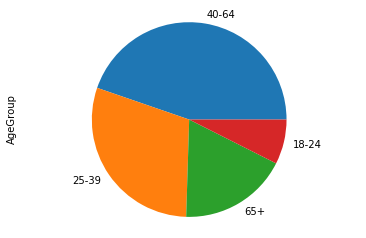

In [327]:
all_voters['AgeGroup'] = pd.cut(all_voters['Age'], 
                                [17, 24, 39, 64, 200], 
                                labels=['18-24', '25-39', '40-64', '65+'])
print count_table(all_voters['AgeGroup']).sort_index()
all_voters['AgeGroup'].value_counts().plot(kind='pie').axis('equal')

## Chronic Voters by Age Group

       Count  Percent
18-24    380      6.5
25-39    869     14.8
40-64   2831     48.3
65+     1784     30.4


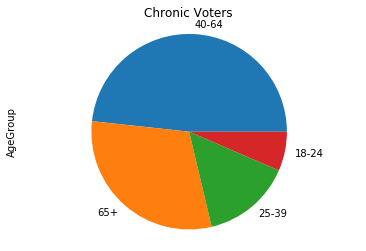

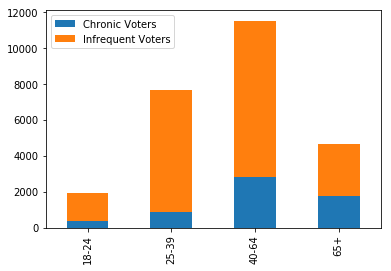

In [332]:
chronic_voters_by_age = all_voters[all_voters['OverAllFrequency'] > 2]
print count_table(chronic_voters_by_age['AgeGroup']).sort_index()
chronic_voters_by_age['AgeGroup'].value_counts().plot(kind='pie', title="Chronic Voters").axis('equal')

infrequent_voters_by_age = all_voters[all_voters['OverAllFrequency'] < 3]
pd.concat([chronic_voters_by_age['AgeGroup'].value_counts().rename('Chronic Voters'), 
           infrequent_voters_by_age['AgeGroup'].value_counts().rename('Infrequent Voters')],
          axis=1).plot(kind='bar', stacked=True)